In [45]:
import random
import numpy
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal

### Defining Auxiliary Functions

In [46]:
# function used to generat y function of x
def fun(x):
    return (1/( pow(x,2) -3*x + 2 ))

In [47]:
# Approximation fun
def approximation(params,x):
        a, b,c,d = params
        return ((a*x+b)/( pow((x),2) +c*x + d ))

In [48]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    return sum((y - approximation(params,x))**2)

In [49]:
# Rational approximation for lm method
def rational_lm(params, x,y):
    return ((y - approximation(params,x))**2)

### Initializing

In [110]:
size_of_array = 1001
error =0.001
delta_normal=numpy.random.rand(size_of_array)    #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y with noise (y), ckear y without noise
    current_x=3*k/1000
    x.append(current_x)
    fun_current=fun(current_x)
    if (fun_current<-100):
        y_clear.append(-100)
        y.append(-100+delta_normal[k])
    elif (fun_current<100):
        y_clear.append(fun_current)
        y.append(fun_current+delta_normal[k])
    else:
        y_clear.append(100)
        y.append(100+delta_normal[k])
x=numpy.array(x)        #transforming to numpy.array for future uses.
y=numpy.array(y)
y_clear=numpy.array(y_clear)

## Applying minimizing methods

In [111]:
# Levenberg Marquardt algorithm
res_lm = optimize.least_squares(rational_lm, [0.1, 0.1,0.1,0.1], args=(x,y), xtol=error, method='lm')
# Nelder-Mead algorithm
res_nm = optimize.minimize(MLS_rational, [0.1, 0.1,0.1,0.1], args=(x,y), tol=error, method='Nelder-Mead')
# Simulated Annealing algorithm
res_anneal = optimize.dual_annealing(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(y, x))
# Differential Evolution algorithm
res_evol = optimize.differential_evolution(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(y, x), tol=error)

### saving the numerical results and print them in a table

In [112]:
result=[]
result.append([res_lm.x[0],res_lm.x[1],res_lm.x[2],res_lm.x[3],0,res_lm.nfev,0])
result.append([res_nm.x[0],res_nm.x[1],res_nm.x[2],res_nm.x[3],res_nm.fun,res_nm.nfev,res_nm.nit])
result.append([res_anneal.x[0],res_anneal.x[1],res_anneal.x[2],res_anneal.x[3],res_anneal.fun,res_anneal.nfev,res_anneal.nit])
result.append([res_evol.x[0],res_evol.x[1],res_evol.x[2],res_evol.x[3],res_evol.fun,res_evol.nfev,res_evol.nit])

In [113]:
# Printing a table with results
rowIDs=[ ' Nelder-Mead algorithm','Nelder-Mead','Simulated Annealing','Differential Evolution ']
print(tabulate(result, headers=['a','b','c','d','function value','function claculation','num of iteration'],numalign ='center',showindex=rowIDs))

                            a         b         c         d       function value    function claculation    num of iteration
----------------------  ---------  --------  --------  --------  ----------------  ----------------------  ------------------
Nelder-Mead algorithm   -0.824732  0.824224  -1.98499  0.985102         0                   165                    0
Nelder-Mead             -1.63631   1.63715   -2.00078  1.00084        153108                353                   199
Simulated Annealing      0.39257      3      -2.03793     3          1841.15                8086                  1000
Differential Evolution  0.392567      3      -2.03793     3          1841.15                2200                   35


### Plotting the results

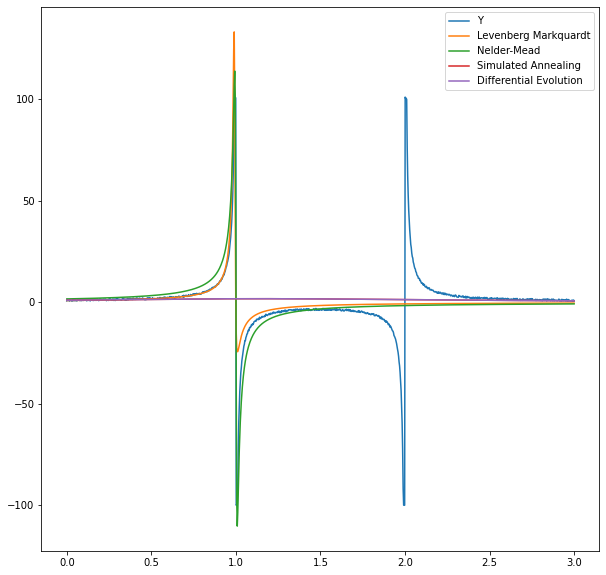

In [120]:
plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.plot(x, approximation( res_lm.x,x))
plt.plot(x, approximation( res_nm.x,x))
plt.plot(x, approximation( res_anneal.x,x))
plt.plot(x, approximation( res_evol.x,x))
plt.legend(['Y', 'Levenberg Markquardt', 'Nelder-Mead', 'Simulated Annealing', 'Differential Evolution'])

#### Plotting each reult individually

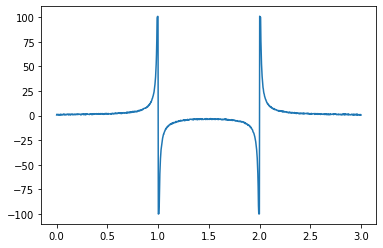

In [115]:
plt.plot(x, y)

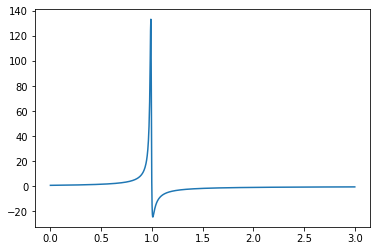

In [116]:
plt.plot(x, approximation( res_lm.x,x))

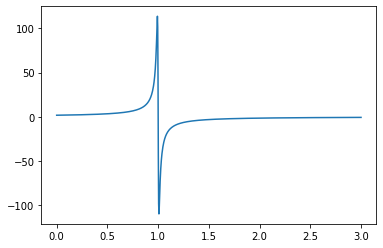

In [117]:
plt.plot(x, approximation( res_nm.x,x))

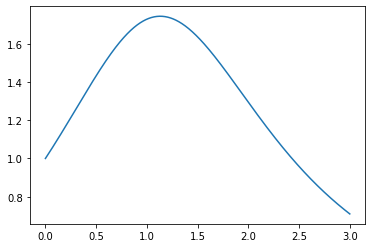

In [118]:
plt.plot(x, approximation( res_anneal.x,x))

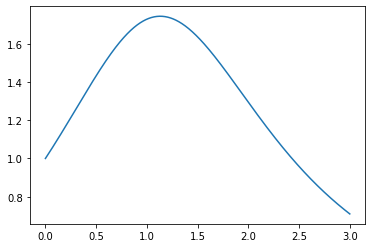

In [119]:
plt.plot(x, approximation( res_evol.x,x))